<a href="https://colab.research.google.com/github/zelalemamera-stonybrook/projects-sandbox/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import torch
import torch.nn as nn
import numpy as np
import torchaudio
!pip install torchcodec
import torchaudio.transforms as T
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

In [205]:
train_table = pd.read_csv('/content/Jordanian_dataset_3_syllable_train.csv')
test_table = pd.read_csv('/content/Jordanian_dataset_3_syllable_test.csv')
dev_table = pd.read_csv('/content/Jordanian_dataset_3_syllable_dev.csv')

In [206]:
stress1_indices = np.where(train_table['stress'] == 1)[0]
stress2_indices = np.where(train_table['stress'] == 2)[0]
stress3_indices = np.where(train_table['stress'] == 3)[0]
stress1_table = train_table.filter(stress1_indices, axis=0)
stress2_table = train_table.filter(stress2_indices, axis=0)
stress3_table = train_table.filter(stress3_indices, axis=0)

In [227]:
stress2_table = stress2_table.sample(n=39, replace=False, axis=0)
stress1_table = stress1_table.sample(n=39, replace=False, axis=0)
stress3_table = stress3_table
balanced_train_table = pd.concat([stress2_table, stress1_table, stress3_table], axis=0)
rows = balanced_train_table.axes[0].size
print(rows)
balanced_train_table = balanced_train_table.sample(n=rows, replace=False, axis=0)
balanced_train_table

117


,Unnamed: 0,text,ipa,syllables,stress,audio_files,audio_urls
29,476,عبقري,ˈʕab.qɑ.ri,3,1,LL-Q55633582 (ajp)-Muhammad (AdrianAbdulBaha)-...,https://upload.wikimedia.org/wikipedia/commons...
125,64,إيرلندا,ʔɪrˈlan.da,3,2,LL-Q55633582 (ajp)-AdrianAbdulBaha-إيرلندا.wav,https://upload.wikimedia.org/wikipedia/commons...
160,274,تقبل,ɪtˈʔab.bal,3,2,LL-Q55633582 (ajp)-Khalil.rantissi-تقَبَّل.wav,https://upload.wikimedia.org/wikipedia/commons...
153,7,استراح,ɪs.taˈrˤɑːħ,3,3,LL-Q55633582 (ajp)-Khalil.rantissi-استَراح.wav,https://upload.wikimedia.org/wikipedia/commons...
271,504,معرفة,ˈmaʕ.rɪ.fe,3,1,LL-Q55633582 (ajp)-Muhammad (AdrianAbdulBaha)-...,https://upload.wikimedia.org/wikipedia/commons...
...,...,...,...,...,...,...,...
314,449,جمجمة,ˈʒʊm.ʒʊ.me,3,1,LL-Q55633582 (ajp)-Muhammad (AdrianAbdulBaha)-...,https://upload.wikimedia.org/wikipedia/commons...
26,300,توصل,ɪtˈwɑsˤ.sˤɑl,3,2,LL-Q55633582 (ajp)-Khalil.rantissi-توَصَّل.wav,https://upload.wikimedia.org/wikipedia/commons...
347,444,بني آدم,ba.ni ˈʔaː.dam,3,1,LL-Q55633582 (ajp)-MahmoudM (AdrianAbdulBaha)-...,https://upload.wikimedia.org/wikipedia/commons...
16,434,أرمني,ˈʔar.ma.ni,3,1,LL-Q55633582 (ajp)-Khalil.rantissi-أرمَني.wav,https://upload.wikimedia.org/wikipedia/commons...


In [246]:
balanced_train_table.axes

[Index([ 29, 125, 160, 153, 271, 336,  36, 171, 397, 142,
        ...
        231, 138, 194, 280, 206, 314,  26, 347,  16, 224],
       dtype='int64', length=117),
 Index(['Unnamed: 0', 'text', 'ipa', 'syllables', 'stress', 'audio_files',
        'audio_urls'],
       dtype='object')]

In [228]:
balanced_train_table.to_csv('/content/balanced_train_3_syllables.csv')

In [29]:
import shutil
import os

def populate_audio(links):
    os.makedirs("/content/drive/MyDrive/dev_audio", exist_ok=True)

    for i, link in enumerate(links):
        substring = re.findall(r"LL.*", link)[0]
        src = f"/content/drive/MyDrive/ajp/{substring}"
        dst = f"/content/drive/MyDrive/dev_audio/audio{i}.wav"
        shutil.copy(src, dst)


In [30]:
populate_audio(list(dev_table['audio_urls']))

In [1]:
!mkdir /content/drive/MyDrive/Train_audio

In [6]:
!cp /content/drive/MyDrive/American\ Visa.jpg /content/drive/MyDrive/Train_audio/copied.jpg

In [106]:
waveform1, samplerate1 = torchaudio.load('/content/drive/MyDrive/Train_audio/audio1.wav', normalize=True)
waveform2, samplerate2 = torchaudio.load('/content/drive/MyDrive/Train_audio/audio2.wav', normalize=True)
print(f"waveform1 shape: {waveform1.shape}", f"samplerate: {samplerate1}")
print(f"waveform2 shape: {waveform2.shape}", f"samplerate: {samplerate2}")


waveform1 shape: torch.Size([1, 57972]) samplerate: 44100
waveform2 shape: torch.Size([1, 71040]) samplerate: 48000


In [107]:
specgram = T.Spectrogram()
spec1 = specgram(waveform1)
spec2 = specgram(waveform2)
power_to_db = T.AmplitudeToDB("power", 80.0)
spec1 = power_to_db(spec1)
spec2 = power_to_db(spec2)


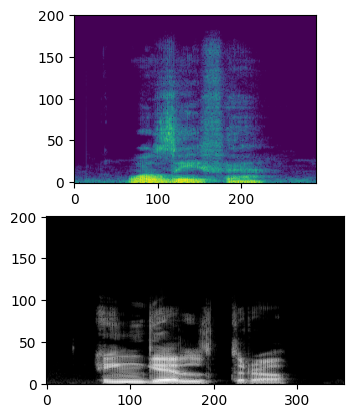

In [108]:
fig, axes = plt.subplots(2)
axes[0].imshow(spec1[0,:,:], origin='lower')
axes[1].imshow(spec2[0,:,:], origin='lower', cmap = 'gray')

In [229]:
def generate_transformed(urls):
  '''
  '''
  pad_size = 0
  max_samplerate = 0
  waveform_list_by_batch = []
  for batch in urls:
    audio_list = []
    for url in batch:
      substring = re.findall(r"LL.*", url)[0]
      waveform, samplerate = torchaudio.load(f"/content/drive/MyDrive/ajp/{substring}")
      waveform = torch.reshape(waveform, (-1,))
      audio_list.append((waveform, samplerate))
    waveform_list_by_batch.append(audio_list)
  for batch in waveform_list_by_batch:
    for tup in batch:
      length = tup[0].shape[0]
      samplert = tup[1]
      if length > pad_size:
        pad_size = length
      if samplert > max_samplerate:
        max_samplerate = samplert
  specgram_tensors_by_batch = []
  for batch in waveform_list_by_batch:
    padded_audio_list = []
    for tup in batch:
      audio_tensor = tup[0]
      difference = pad_size - audio_tensor.shape[0]
      pad = torch.zeros((difference))
      audio_tensor = torch.cat((audio_tensor, pad))
      padded_audio_list.append(audio_tensor)
    padded_audio_tuple = tuple(padded_audio_list)
    waveform_tensors = torch.vstack(padded_audio_tuple)
    spec_gram = T.Spectrogram()
    spec_gram_tensors = spec_gram(waveform_tensors)
    power_to_db = T.AmplitudeToDB("power", 80.0)
    spec_gram_tensors = power_to_db(spec_gram_tensors)
    specgram_tensors_by_batch.append(spec_gram_tensors)
  return specgram_tensors_by_batch


In [230]:
def save_generated_dataset():
  '''
  '''
  list_of_urls = [list(balanced_train_table['audio_urls']), list(test_table['audio_urls']), list(dev_table['audio_urls'])]
  spec_gram_tensors_by_batch = generate_transformed(list_of_urls)
  torch.save(spec_gram_tensors_by_batch[0], '/content/train_X.pt')
  torch.save(spec_gram_tensors_by_batch[1], '/content/test_X.pt')
  torch.save(spec_gram_tensors_by_batch[2], '/content/dev_X.pt')
  torch.save(torch.tensor(list(balanced_train_table['stress'])), '/content/train_Y.pt')
  torch.save(torch.tensor(list(test_table['stress'])), '/content/test_Y.pt')
  torch.save(torch.tensor(list(dev_table['stress'])), '/content/dev_Y.pt')

In [231]:
save_generated_dataset()

In [232]:
X_train = torch.load('/content/train_X.pt')

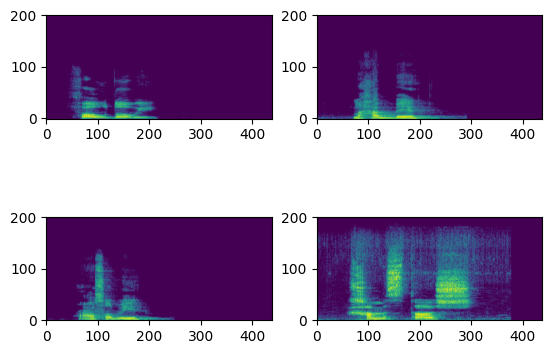

In [243]:
fig, axes = plt.subplots(2,2)
axes[0,0].imshow(X_train[50,0,:,:], origin='lower')
axes[0,1].imshow(X_train[51,0,:,:], origin='lower')
axes[1,0].imshow(X_train[52,0,:,:], origin='lower')
axes[1,1].imshow(X_train[53,0,:,:], origin='lower')

In [254]:
a = torch.add(torch.tensor(list(balanced_train_table['stress'])), -1)
print(a, f"\n{Y_train}")
print(torch.sum(torch.eq(a,Y_train)))

tensor([0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0,
        2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0,
        2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2,
        1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2]) 
tensor([0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0,
        2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0,
        2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2,
        1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2])
tensor(117)


In [241]:
X_train = torch.load('/content/train_X.pt')
n, x, y = X_train.shape[0], X_train.shape[1], X_train.shape[2]
X_train = torch.reshape(X_train, (n, 1, x, y))
X_dev = torch.load('/content/dev_X.pt')
n, x, y = X_dev.shape[0], X_dev.shape[1], X_dev.shape[2]
X_dev = torch.reshape(X_dev, (n, 1, x, y))
Y_train = torch.load('/content/train_Y.pt')
Y_train = torch.add(Y_train, -1)
Y_dev = torch.load('/content/dev_Y.pt')
Y_dev = torch.add(Y_dev, -1)

In [248]:
print(X_train.shape, X_dev.shape)

torch.Size([117, 1, 201, 438]) torch.Size([52, 1, 201, 438])


In [247]:
torch.max(Y_train)

tensor(2)

Proposed Architecture

Input: (1 x 201 x 438)\
ConvLayer1: (2 x 38) stride (1, 2)\
(1 x 200 x 201)\
ConvLayer2: (2,3) stride(2,2)\
(1 x 100 x 100)\
ConvLayer3: (2,2) stride=2\
(1 x 50 x 50)\
Pool: (2,2) stride=2\
(1 x 25 x 25)\
LinearLayer1: (64 x 625)\
(64)\
LinearLayer2: (3 x 64) Softmax\
(3)


In [271]:
class conv_net(nn.Module):
  '''
  '''
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 1, (2, 38), stride=(1,2))
    self.conv2 = nn.Conv2d(1, 1, (2,3), stride=2)
    self.conv3 = nn.Conv2d(1,1, (2,2), stride=2)
    self.pool1 = nn.MaxPool2d(2, stride=2)
    self.linear1 = nn.Linear(625, 64)
    self.linear2 = nn.Linear(64, 3)
    self.activate = nn.ReLU()
    self.loss = nn.CrossEntropyLoss()

  def forward(self, input_batch):
    hidden1 = self.activate(self.conv1(input_batch))
    #print(f"hidden1 shape: {hidden1.shape}")
    hidden2 = self.activate(self.conv2(hidden1))
    #print(f"hidden2 shape: {hidden2.shape}")
    hidden3 = self.activate(self.conv3(hidden2))
    #print(f"hidden3 shape: {hidden3.shape}")
    hidden4 = self.pool1(hidden3)
    #print(f"hidden4 shape: {hidden4.shape}")
    flat = nn.Flatten()
    hidden4 = flat(hidden4)
    #print(f"hidden4 shape: {hidden4.shape}")
    hidden5 = self.activate(self.linear1(hidden4))
    #print(f"hidden5 shape: {hidden5.shape}")
    hidden6 = self.linear2(hidden5)
    #print(f"hidden6 shape: {hidden6.shape}")
    sf = nn.Softmax(dim=1)
    output = sf(hidden6)
    return output


In [276]:
def train(model, input_data, target_data, max_epochs):
  '''
  '''
  model.train()
  optimizer = torch.optim.Adam(model.parameters())
  accuracy = 0
  n = 0
  last_improvement = 0
  while(accuracy < 95 and n < max_epochs and last_improvement < 10):
    optimizer.zero_grad()
    output = model.forward(input_data)
    loss = model.loss(output, target_data)
    loss.backward()
    optimizer.step()
    accuracy_new = model_accuracy(model, input_data, target_data)
    if accuracy_new <= accuracy:
      last_improvement +=1
    else:
      last_improvement = 0
    accuracy = accuracy_new
    print('Score:', accuracy, '\nEpoch: ', n)
    n += 1


In [257]:
def model_accuracy(model, input_data, target_data):
  '''
  '''
  model.eval()
  predictions = torch.argmax(model.forward(input_data), dim=1)
  score = 100 * (torch.sum(torch.eq(predictions, target_data))).item() / len(target_data)
  return score

In [258]:
def confusion_matrix(model, input_data, target_data):
  '''
  '''
  predictions = torch.argmax(model.forward(input_data), dim=1)
  true_class1_model_class1 = 0
  true_class2_model_class2 = 0
  true_class3_model_class3 = 0
  true_class1_model_class2 = 0
  true_class1_model_class3 = 0
  true_class2_model_class1 = 0
  true_class2_model_class3 = 0
  true_class3_model_class1 = 0
  true_class3_model_class2 = 0
  for i in range(len(target_data)):
    if target_data[i].item() == predictions[i].item():
      c = target_data[i].item()
      if c == 0:
        true_class1_model_class1+=1
      elif c == 1:
        true_class2_model_class2+=1
      else:
        true_class3_model_class3+=1
    else:
      target = target_data[i].item()
      predicted = predictions[i].item()
      if target == 0:
        if predicted == 1:
          true_class1_model_class2+=1
        else:
          true_class1_model_class3+=1
      elif target == 1:
        if predicted == 0:
          true_class2_model_class1+=1
        else:
          true_class2_model_class3+=1
      else:
        if predicted == 0:
          true_class3_model_class1+=1
        else:
          true_class3_model_class2+=1
  confusion_matrix = torch.tensor(
        [[true_class1_model_class1, true_class1_model_class2, true_class1_model_class3],
        [true_class2_model_class1, true_class2_model_class2, true_class2_model_class3],
        [true_class3_model_class1, true_class3_model_class2, true_class3_model_class3]]
    )
  return confusion_matrix

In [273]:
convnet = conv_net()

In [277]:
train(convnet, X_train, Y_train, 100)

Score: 87.17948717948718 
Epoch:  0
Score: 92.3076923076923 
Epoch:  1
Score: 91.45299145299145 
Epoch:  2
Score: 93.16239316239316 
Epoch:  3
Score: 94.01709401709402 
Epoch:  4
Score: 93.16239316239316 
Epoch:  5
Score: 93.16239316239316 
Epoch:  6
Score: 91.45299145299145 
Epoch:  7
Score: 93.16239316239316 
Epoch:  8
Score: 94.87179487179488 
Epoch:  9
Score: 95.72649572649573 
Epoch:  10


In [278]:
print(f"accuracy: {model_accuracy(convnet, X_dev, Y_dev)}",
      f"\nconfusion matix:\n {confusion_matrix(convnet, X_dev, Y_dev)}")

accuracy: 78.84615384615384 
confusion matix:
 tensor([[ 4,  0,  1],
        [ 2, 32,  6],
        [ 1,  1,  5]])
